In [1]:
workdir = "/SNS/users/lj7/dv/sns-chops/detcalib/SEQ"
%cd {workdir}

/SNS/users/lj7/dv/sns-chops/detcalib/SEQ


In [2]:
import sys, os, numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

In [3]:
sys.path.insert(0, "%s/lib"%workdir)

In [4]:
#sys.path

In [5]:
import get_I_tof
reload(get_I_tof)

<module 'get_I_tof' from '/SNS/users/lj7/dv/sns-chops/detcalib/SEQ/lib/get_I_tof.pyc'>

In [6]:
import get_difc_from_Itof
reload(get_difc_from_Itof)

<module 'get_difc_from_Itof' from '/SNS/users/lj7/dv/sns-chops/detcalib/SEQ/lib/get_difc_from_Itof.pyc'>

In [7]:
import align
reload(align)
import align_utils
reload(align_utils)

<module 'align_utils' from '/SNS/users/lj7/dv/sns-chops/detcalib/SEQ/lib/align_utils.pyc'>

In [8]:
pack = 'C25B/eightpack-bottom'
packname, packtype = pack.split('/')

# C60

In [11]:
# np.load('Si-I_tof/I_tof-xbb.npy')

In [9]:
ls C60-I_tof/*{packname}*

C60-I_tof/I_tof-y-C25B.npy  C60-I_tof/pack-C25B.yaml


In [10]:
cat C60-I_tof/pack-{packname}.yaml

pixelIDs:
  first: 102400
  last: 103423


<IPython.core.display.Javascript object>


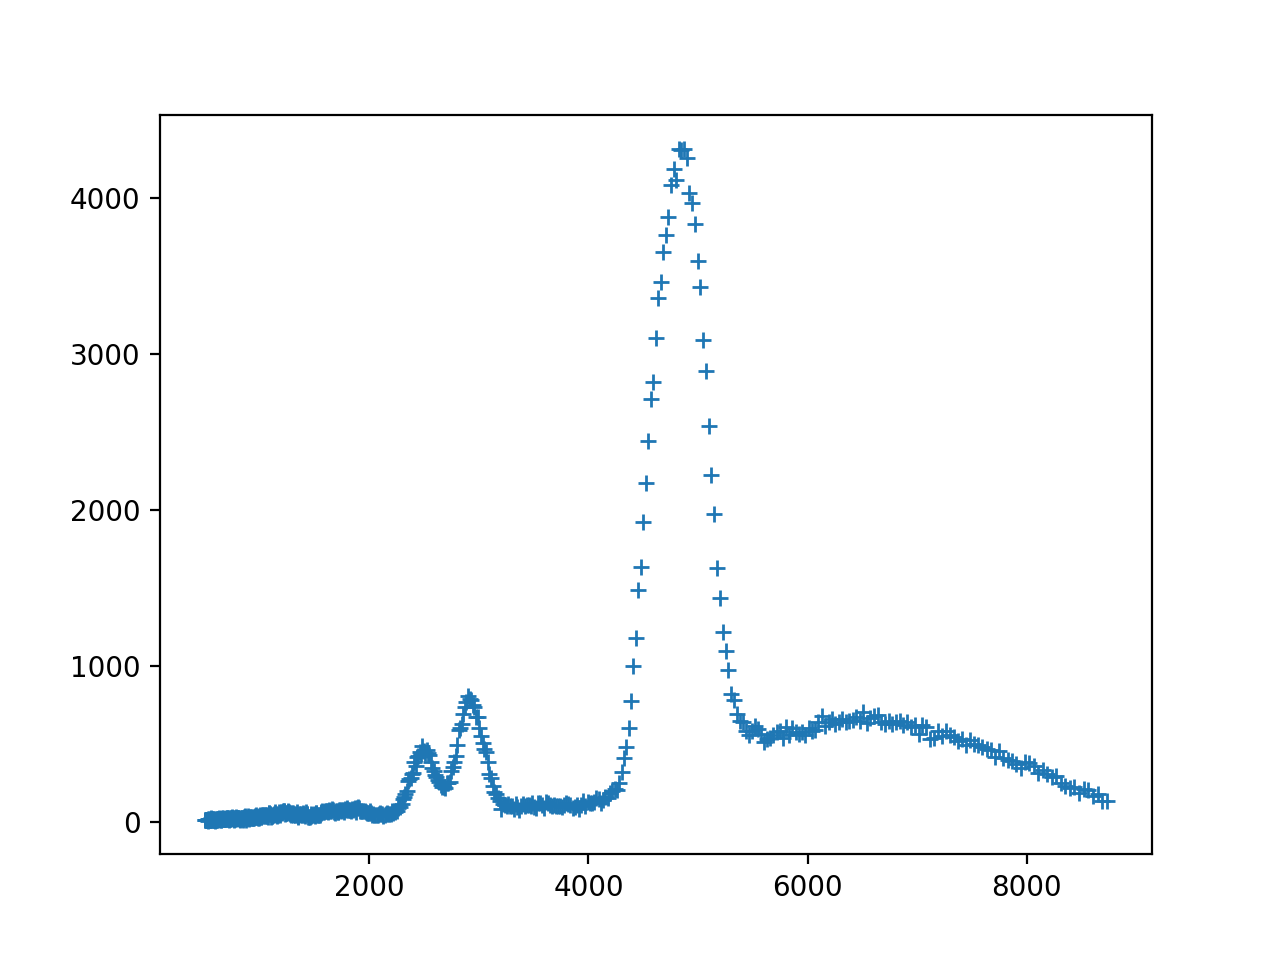

In [11]:
xbb = np.load('C60-I_tof/I_tof-xbb.npy')
x = (xbb[:-1] + xbb[1:])/2
ypack = np.load('C60-I_tof/I_tof-y-%s.npy' % packname)
plt.figure()
plt.plot(x, ypack[60], '+')

## Obtain difc

In [12]:
fitter = get_difc_from_Itof.Fitter(
    peak_fractional_width=0.05, bg_type='linear', curve_fit_options=dict(maxfev=1000), t0_range=(0, 100))
dvalues = [2.72509327, 2.89039789, 3.16627225, 3.24852679, 4.26940063, 5.00631601, 7.08,  8.17527981]
dmin=2.5; dmax=10

In [13]:
I_tof_dir = 'C60-I_tof'

gpd = get_difc_from_Itof.GetPackDifc(
    pack=packname,
    dvalues=dvalues,
    dmin=dmin, dmax=dmax,
    I_tof_dir = I_tof_dir,
    fitter=fitter,
    maxchisq = 100.,
    min_counts = 50000)

* tof range: 2083.33333333 8333.33333333


21.9892025866
590.05124209 590.347337374 7.29051552183e-18


<IPython.core.display.Javascript object>


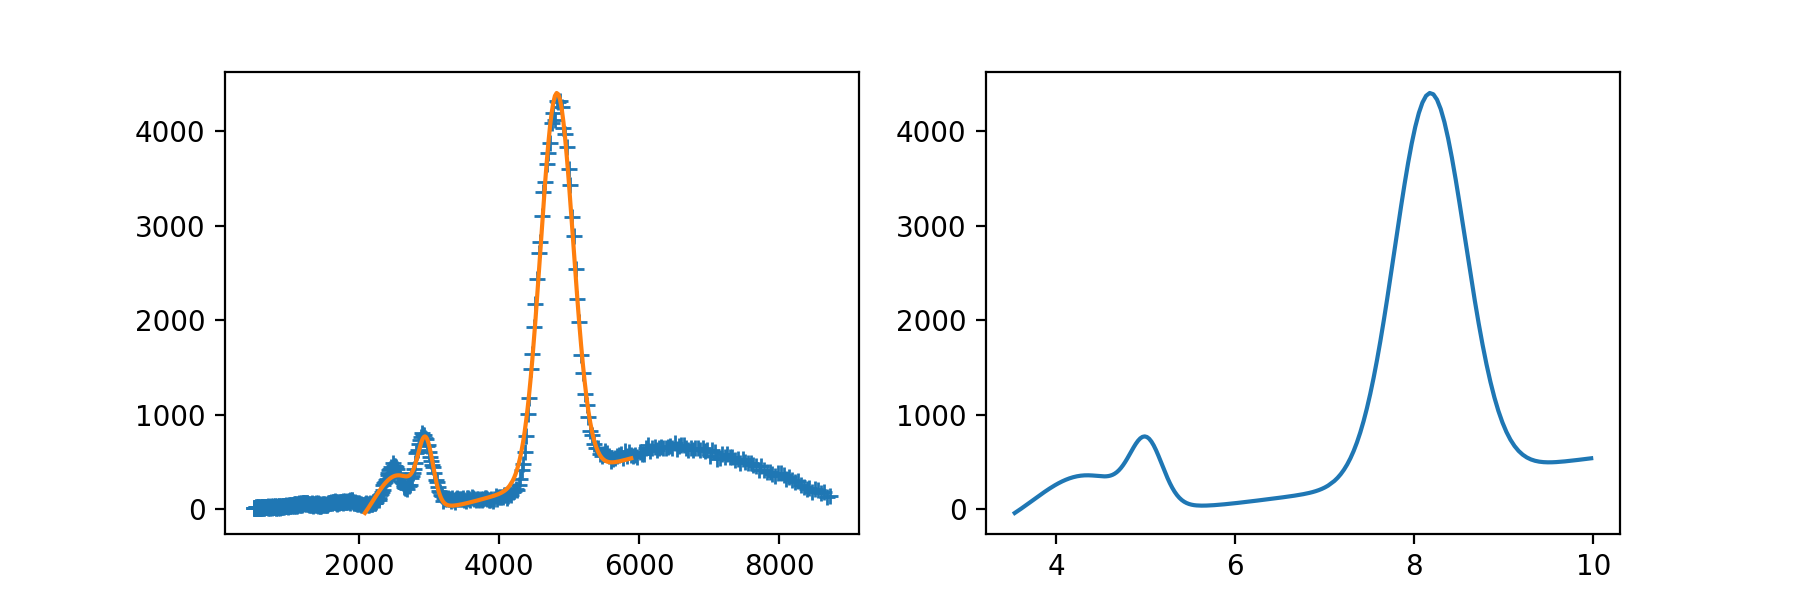

CPU times: user 318 ms, sys: 17.6 ms, total: 336 ms
Wall time: 322 ms


In [14]:
%%time
olddifc_pixel, newdifc_pixel, newt0_pixel, (x,y,fitx,fity, d), (fitfunc, popt, (p0, lower, upper), chisq) \
    = gpd.fitOnePixel(60)
print chisq
print olddifc_pixel, newdifc_pixel, newt0_pixel
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plt.plot(x,y, '+')
plt.plot(fitx, fity)
plt.subplot(1,2,2)
plt.plot(d, fity)

5.35348456928
476.629848599 463.946490264 8.7962164426e-22


<IPython.core.display.Javascript object>


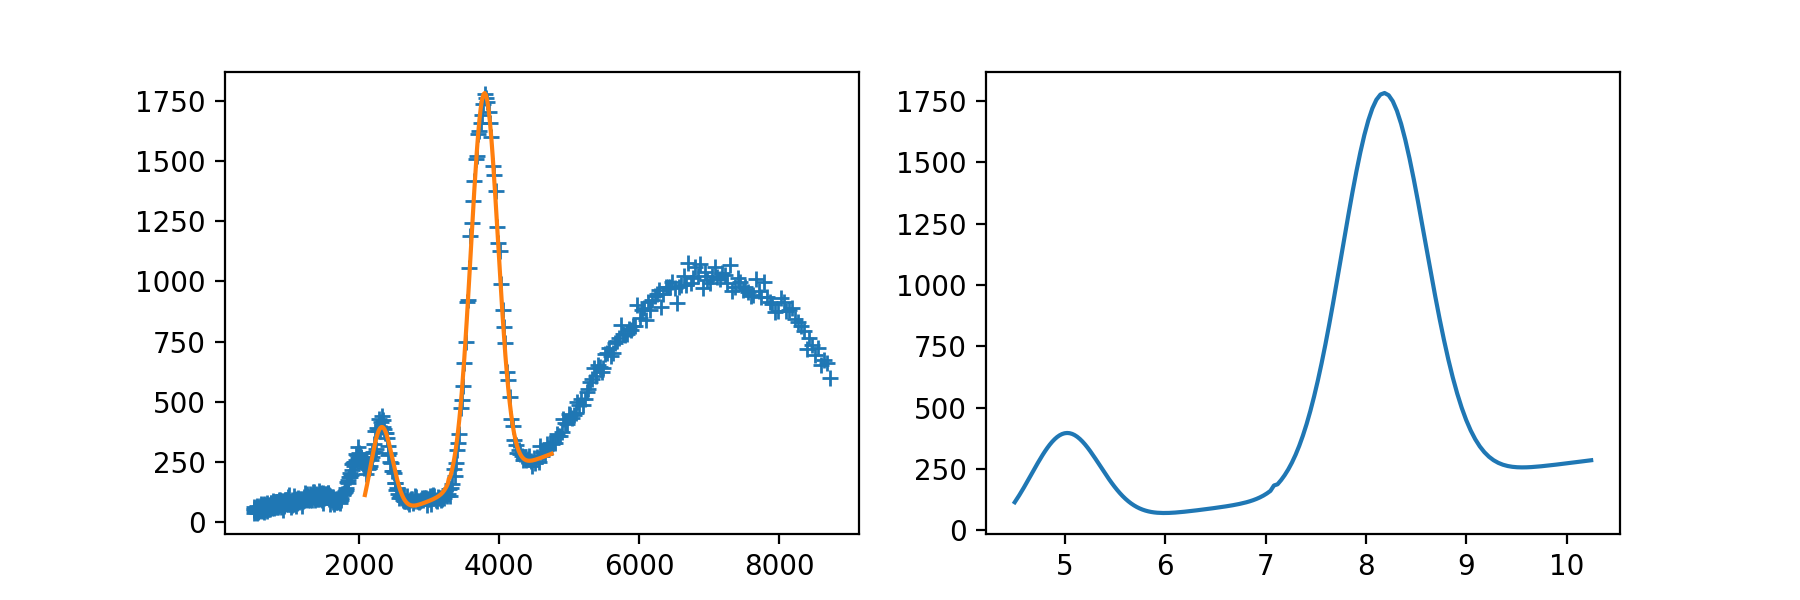

CPU times: user 244 ms, sys: 27.2 ms, total: 272 ms
Wall time: 258 ms


In [15]:
%%time
olddifc_pixel, newdifc_pixel, newt0_pixel, (x,y,fitx,fity, d), (fitfunc, popt, (p0, lower, upper), chisq) \
    = gpd.fitOnePixel(100)
print chisq
print olddifc_pixel, newdifc_pixel, newt0_pixel
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plt.plot(x,y, '+')
plt.plot(fitx, fity)
plt.subplot(1,2,2)
plt.plot(d, fity)

30.2195050656
676.758561452 684.851285237 2.15420101121e-14


<IPython.core.display.Javascript object>


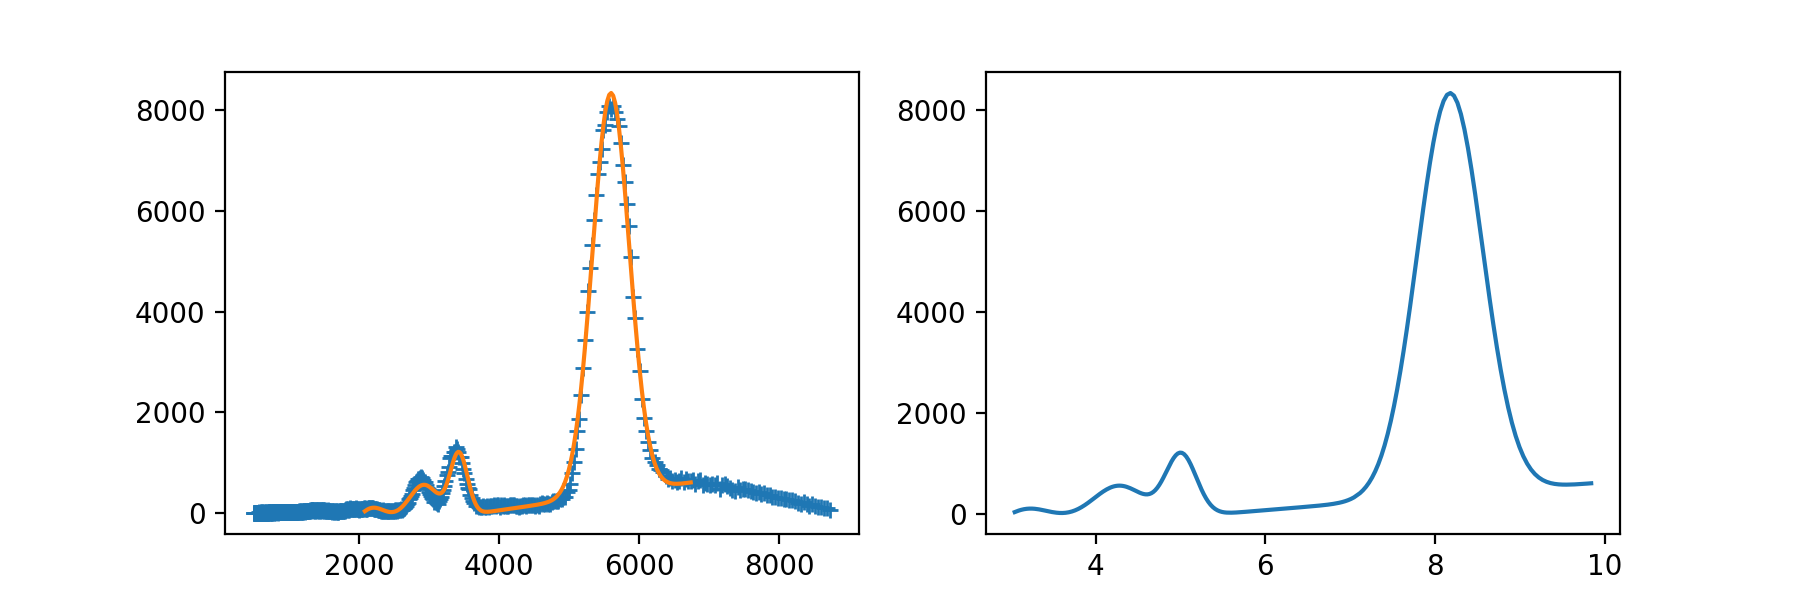

CPU times: user 351 ms, sys: 44.7 ms, total: 396 ms
Wall time: 367 ms


In [16]:
%%time
olddifc_pixel, newdifc_pixel, newt0_pixel, (x,y,fitx,fity, d), (fitfunc, popt, (p0, lower, upper), chisq) \
    = gpd.fitOnePixel(30)
print chisq
print olddifc_pixel, newdifc_pixel, newt0_pixel
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plt.plot(x,y, '+')
plt.plot(fitx, fity)
plt.subplot(1,2,2)
plt.plot(d, fity)

In [17]:
%%time
C60_difc, C60_mask = gpd()

- Working on pixel 0
.* Not enough counts: 0
* fit failed: pixel 0
.* Not enough counts: 1
* fit failed: pixel 1
.* Not enough counts: 2
* fit failed: pixel 2
.* Not enough counts: 3
* fit failed: pixel 3
................................................................................................- Working on pixel 100
..................* Not enough counts: 117
* fit failed: pixel 117
.* Not enough counts: 118
* fit failed: pixel 118
.* Not enough counts: 119
* fit failed: pixel 119
.* Not enough counts: 120
* fit failed: pixel 120
.* Not enough counts: 121
* fit failed: pixel 121
.* Not enough counts: 122
* fit failed: pixel 122
.* Not enough counts: 123
* fit failed: pixel 123
.* Not enough counts: 124
* fit failed: pixel 124
.* Not enough counts: 125
* fit failed: pixel 125
.* Not enough counts: 126
* fit failed: pixel 126
.* Not enough counts: 127
* fit failed: pixel 127
.* Not enough counts: 128
* fit failed: pixel 128
.* Not enough counts: 129
* fit failed: pixel 129
.* Not en

.* Not enough counts: 891
* fit failed: pixel 891
.* Not enough counts: 892
* fit failed: pixel 892
.* Not enough counts: 893
* fit failed: pixel 893
.* Not enough counts: 894
* fit failed: pixel 894
.* Not enough counts: 895
* fit failed: pixel 895
.* Not enough counts: 896
* fit failed: pixel 896
.* Not enough counts: 897
* fit failed: pixel 897
.* Not enough counts: 898
* fit failed: pixel 898
.* Not enough counts: 899
* fit failed: pixel 899
- Working on pixel 900
.* Not enough counts: 900
* fit failed: pixel 900
...................................................................................................- Working on pixel 1000
.* Not enough counts: 1000
* fit failed: pixel 1000
.* Not enough counts: 1001
* fit failed: pixel 1001
.* Not enough counts: 1002
* fit failed: pixel 1002
.* Not enough counts: 1003
* fit failed: pixel 1003
.* Not enough counts: 1004
* fit failed: pixel 1004
.* Not enough counts: 1005
* fit failed: pixel 1005
.* Not enough counts: 1006
* fit failed: p

<IPython.core.display.Javascript object>


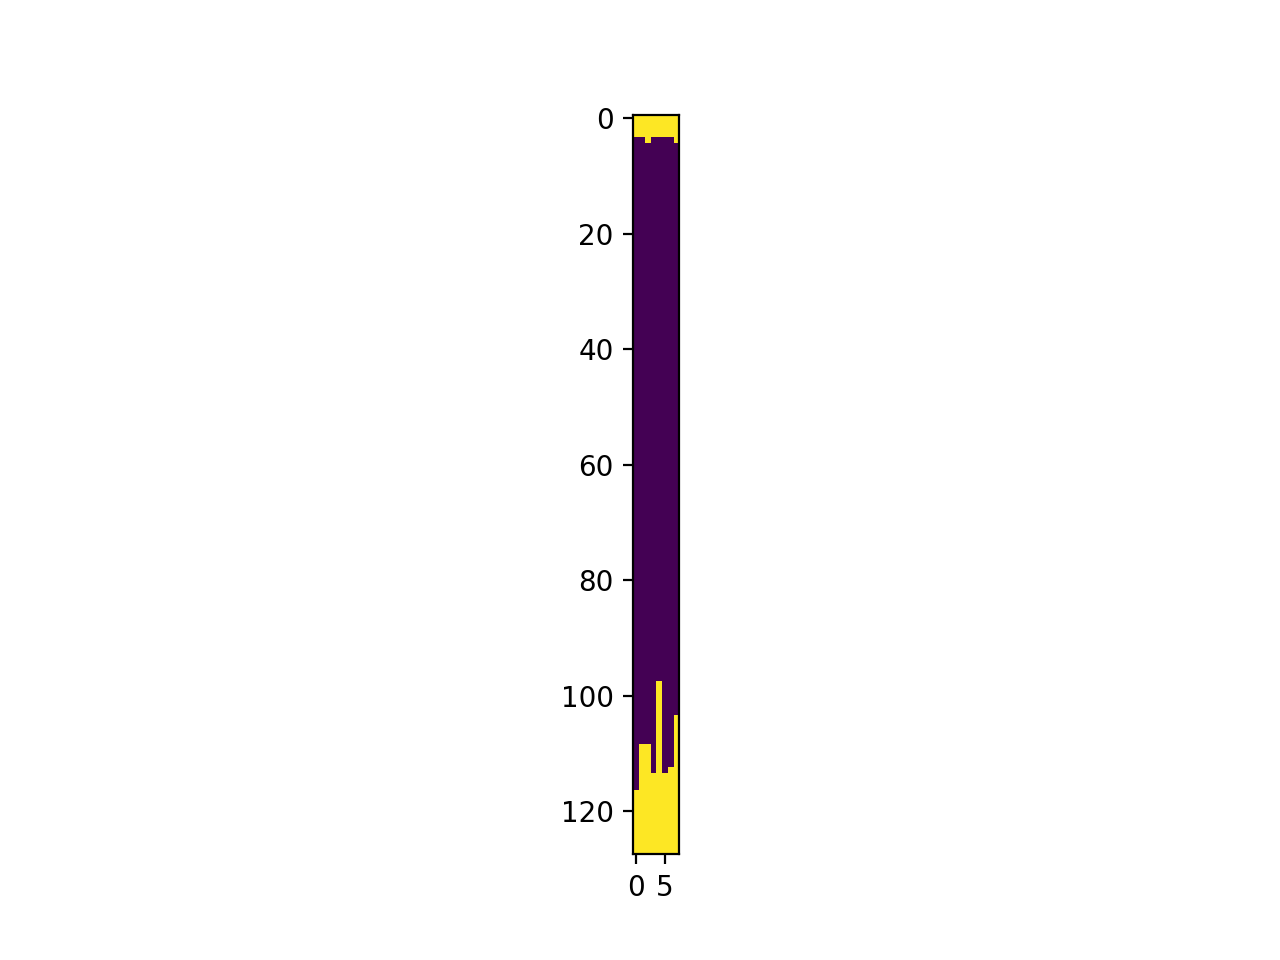

In [19]:
view = C60_mask.view()
view.shape = 8, 128
plt.figure()
plt.imshow(view.T)

In [20]:
np.save(os.path.join(I_tof_dir, 'difc-%s.npy' % packname), C60_difc)
np.save(os.path.join(I_tof_dir, 'mask-%s.npy' % packname), C60_mask)

In [21]:
I_tof_dir = 'C60-I_tof' 
!ls {I_tof_dir}/*-{packname}.npy

C60-I_tof/difc-C25B.npy  C60-I_tof/I_tof-y-C25B.npy  C60-I_tof/mask-C25B.npy


# Align

In [22]:
alignment = align.Align('./C60-I_tof')
alignment.options['Xposition'] = (-.02, .02)
alignment.options['Yposition'] = (-.02, .02)

In [23]:
alignment.load_L2_from_nxs('./L2table.nxs')

(array([-1.        , -1.        , -1.        , ...,  5.68382549,
         5.69823694,  5.67509985]),
 array([ True,  True,  True, ..., False, False, False], dtype=bool))

In [24]:
%%time
result = alignment.align(C60_difc, C60_mask, packname, ofile=open('new-%s.xml' % packname, 'wt'))

2017-12-04 22:24:10,251 - Align component - INFO - Working on init_IDF.xml/C row/C25B/eightpack-bottom. Starting position is [0.06600619612, -0.468884, 5.50764222828], Starting rotation is [-178.16963756000004, 0.0, -0.0]


- Working on C25B
- pack params: [0.06600619612, -0.468884, 5.50764222828, -178.16963756000004, 0.0, -0.0]
* initial parameters:  [0.06600619612, -0.468884, 5.50764222828, -178.16963756000004, 0.0, -0.0]


2017-12-04 22:25:11,688 - Align component - INFO - Finished optimizing init_IDF.xml/C row/C25B/eightpack-bottom. Final position is [0.046006196119999995, -0.4698152699877262, 5.502567527184603], Final rotation is [-178.16964969169467, 0.0, 0.0]


- Estimate: (0.054283473032709632, -0.468884, 5.5133160615746215)
- New: [0.046006196119999995, -0.4698152699877262, 5.502567527184603, -178.16964969169467, 0.0, 0.0]

  <type name="C25B">
    <component type="eightpack-bottom">
      <location x="0.04600620" y="-0.46981527" z="5.50256753">
         <rot axis-z="0" axis-x="0" axis-y="1" val="-178.16964969"/>
      </location>
    </component>
  </type>

CPU times: user 1min 2s, sys: 1.29 s, total: 1min 3s
Wall time: 1min 3s


In [133]:
new_params, fit = result

In [134]:
fit.options

OrderedDict([('Xposition', (-0.02, 0.02)),
             ('Yposition', (-0.02, 0.02)),
             ('Zposition', (-0.3, 0.3)),
             ('AlphaRotation', (-2.0, 2.0)),
             ('BetaRotation', False),
             ('GammaRotation', False)])

In [127]:
fit.cost([0.11326686170572708, 5.508410917878781, -179.42879915103185])

0.00022539444183761981

In [128]:
fit.cost([0.06600619612, 5.50764222828, -178.16963756000004])

0.000495214006710285